In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from src.features.encodings import multiple, ncp, pstnpss, pse_knc, binary
from src.dataset import load_benchmark_dataset, Species, Modification, SeqBunch

In [2]:
dataset = load_benchmark_dataset(Species.human, Modification.psi)
dataset_test = load_benchmark_dataset(Species.human, Modification.psi, True)

In [3]:
encoder = multiple.Encoder(encoders=[
    binary.Encoder(),
    ncp.Encoder(),
    pstnpss.Encoder(),
    pse_knc.Encoder()
])

In [4]:
samples = encoder.fit_transform(dataset.samples, y=dataset.targets)
samples_test = encoder.transform(dataset_test.samples)

In [11]:
N_CLUSTERS = 10

In [12]:
def visualize_cluster(tsne_data, cluster_data, targets, pathstr: str):
    # tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
    # tsne_df['Cluster'] = cluster_data
    # 
    # # Plot the clusters
    # plt.figure(figsize=(10, 8))
    # sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette=sns.color_palette('hsv', N_CLUSTERS), data=tsne_df, legend='full')
    # plt.title('Clusters Visualized using t-SNE')
    # plt.xlabel('t-SNE Component 1')
    # plt.ylabel('t-SNE Component 2')
    # 
    # plt.savefig(f'{pathstr}.png', format='png')
    tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = cluster_data
    tsne_df['Target'] = targets

    # Create a figure
    plt.figure(figsize=(10, 8))
    
    # Plot each point, checking the target to determine border
    for i in range(tsne_df.shape[0]):
        plt.scatter(tsne_df.loc[i, 'TSNE1'], tsne_df.loc[i, 'TSNE2'], 
                    c=sns.color_palette('hsv', tsne_df['Cluster'].nunique())[tsne_df.loc[i, 'Cluster']], 
                    edgecolors='black' if tsne_df.loc[i, 'Target'] == 1 else 'none', 
                    linewidth=1, 
                    s=50) # Adjust 's' for size of points

    plt.title('Clusters Visualized using t-SNE')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.savefig(f'{pathstr}.png', format='png')
    plt.show()

/var/folders/pr/4495xxw90_g8dgzr4yr3lsyh0000gn/T/ipykernel_55159/3362620892.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_df.loc[i, 'TSNE1'], tsne_df.loc[i, 'TSNE2'],


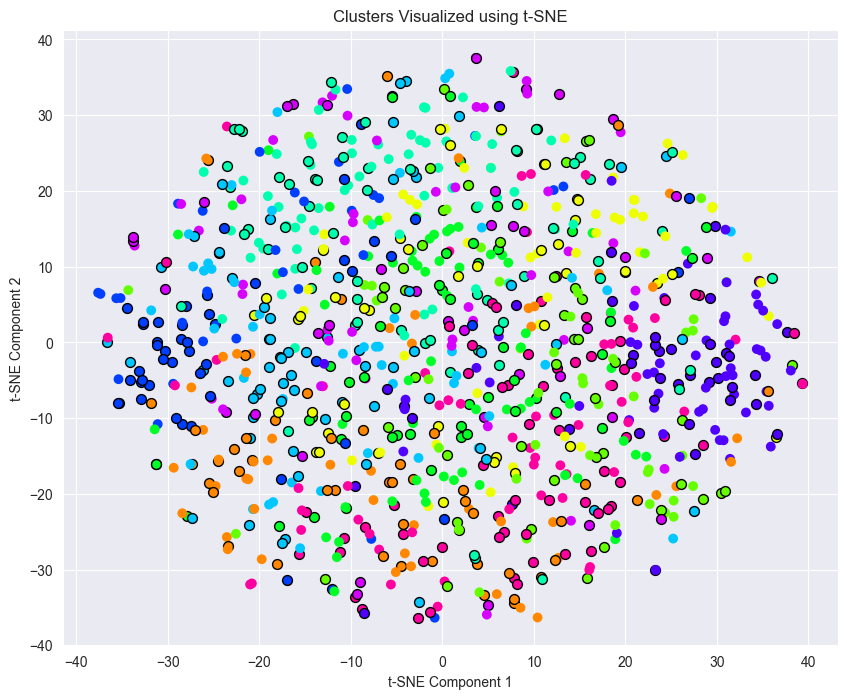

/var/folders/pr/4495xxw90_g8dgzr4yr3lsyh0000gn/T/ipykernel_55159/3362620892.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_df.loc[i, 'TSNE1'], tsne_df.loc[i, 'TSNE2'],


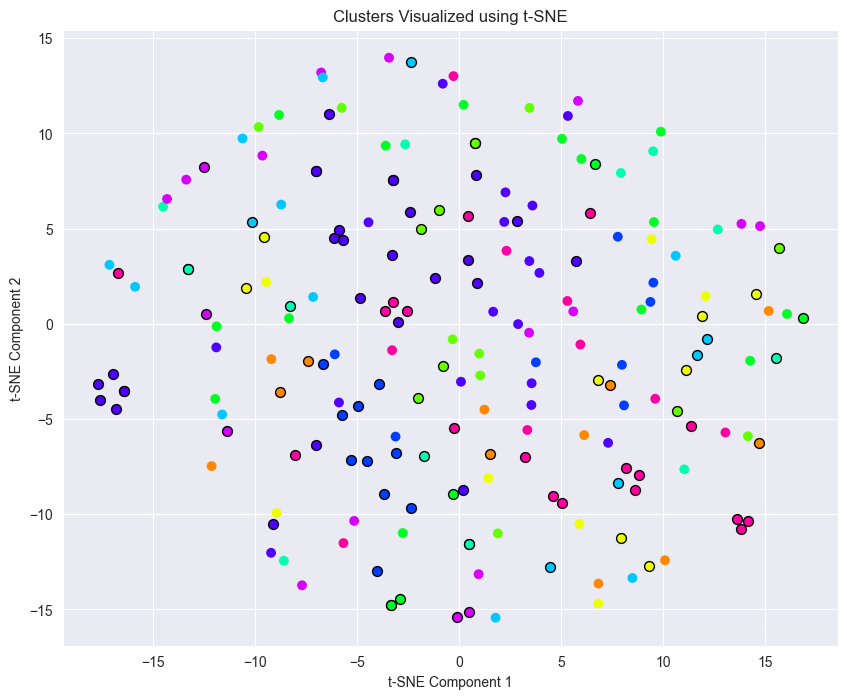

In [13]:
tsne_model = TSNE(n_components=2, random_state=42)
cluster_model = KMeans(n_clusters=N_CLUSTERS, random_state=42)

cluster_train = cluster_model.fit_predict(samples)
cluster_test = cluster_model.predict(samples_test)

train_tsne = tsne_model.fit_transform(samples)
test_tsne = tsne_model.fit_transform(samples_test)

visualize_cluster(train_tsne, cluster_train, dataset.targets, f'K-Mean({N_CLUSTERS})[train]')
visualize_cluster(test_tsne, cluster_test, dataset_test.targets, f'K-Mean({N_CLUSTERS})[test]')

In [23]:
print(dataset.targets[cluster_train == 0].value_counts())
print(dataset.targets[cluster_train == 1].value_counts())
print(dataset.targets[cluster_train == 2].value_counts())
print(dataset.targets[cluster_train == 3].value_counts())
print(dataset.targets[cluster_train == 4].value_counts())
print(dataset.targets[cluster_train == 5].value_counts())
print(dataset.targets[cluster_train == 6].value_counts())
print(dataset.targets[cluster_train == 7].value_counts())
print(dataset.targets[cluster_train == 8].value_counts())
print(dataset.targets[cluster_train == 9].value_counts())

1
0    49
1    48
Name: count, dtype: int64
1
0    49
1    41
Name: count, dtype: int64
1
0    46
1    44
Name: count, dtype: int64
1
0    61
1    46
Name: count, dtype: int64
1
1    64
0    61
Name: count, dtype: int64
1
1    65
0    45
Name: count, dtype: int64
1
1    49
0    30
Name: count, dtype: int64
1
0    54
1    39
Name: count, dtype: int64
1
0    45
1    39
Name: count, dtype: int64
1
1    60
0    55
Name: count, dtype: int64


In [24]:
print(dataset_test.targets[cluster_test == 0].value_counts())
print(dataset_test.targets[cluster_test == 1].value_counts())
print(dataset_test.targets[cluster_test == 2].value_counts())
print(dataset_test.targets[cluster_test == 3].value_counts())
print(dataset_test.targets[cluster_test == 4].value_counts())
print(dataset_test.targets[cluster_test == 5].value_counts())
print(dataset_test.targets[cluster_test == 6].value_counts())
print(dataset_test.targets[cluster_test == 7].value_counts())
print(dataset_test.targets[cluster_test == 8].value_counts())
print(dataset_test.targets[cluster_test == 9].value_counts())

1
0    7
1    5
Name: count, dtype: int64
1
1    8
0    7
Name: count, dtype: int64
1
1    8
0    8
Name: count, dtype: int64
1
0    14
1     6
Name: count, dtype: int64
1
1    7
0    7
Name: count, dtype: int64
1
0    10
1     6
Name: count, dtype: int64
1
1    10
0     8
Name: count, dtype: int64
1
1    26
0    17
Name: count, dtype: int64
1
0    13
1     5
Name: count, dtype: int64
1
1    19
0     9
Name: count, dtype: int64
